In [1]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Read in the csv into a Pandas Dataframe
df = pd.read_csv("Resources\pokemon_combats_etl.csv")
df.info()


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
C:\Users\matth\AppData\Local\Temp\ipykernel_10448\2900948882.py:11: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("Resources\pokemon_combats_etl.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40646 entries, 0 to 40645
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_effectiveness   40646 non-null  float64
 1   first_hp              40646 non-null  int64  
 2   first_attack          40646 non-null  int64  
 3   first_defense         40646 non-null  int64  
 4   first_sp_atk          40646 non-null  int64  
 5   first_sp_def          40646 non-null  int64  
 6   first_speed           40646 non-null  int64  
 7   first_mythical        40646 non-null  int64  
 8   first_legendary       40646 non-null  int64  
 9   second_effectiveness  40646 non-null  float64
 10  second_hp             40646 non-null  int64  
 11  second_attack         40646 non-null  int64  
 12  second_defense        40646 non-null  int64  
 13  second_sp_atk         40646 non-null  int64  
 14  second_sp_def         40646 non-null  int64  
 15  second_speed       

In [2]:
# Split our preprocessed data into our features and target arrays
X = df.drop("winner", axis=1)
y = df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [3]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Create the random forest classifier instance & Fit the model

rf_model = RandomForestClassifier(n_estimators=500, random_state=78).fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Precision: {precision_score(y_test, rf_predictions)}")
print(f"Recall: {recall_score(y_test, rf_predictions)}")

Accuracy: 0.9435150560913206
Precision: 0.9563335215509129
Recall: 0.9369352756776692


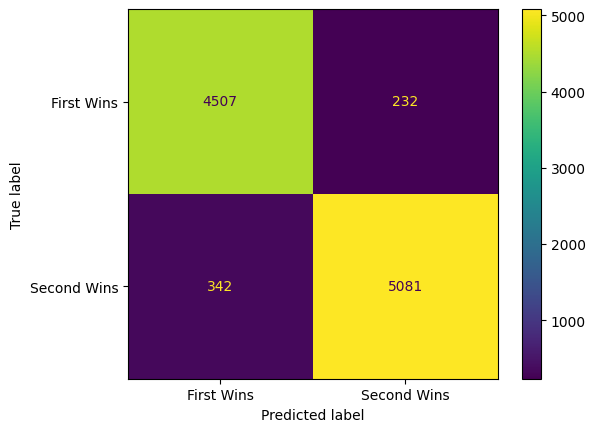

In [5]:
# Display the results in a Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_predictions), display_labels=["First Wins", "Second Wins"])
disp.plot()

# Finding the Most Important Features


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

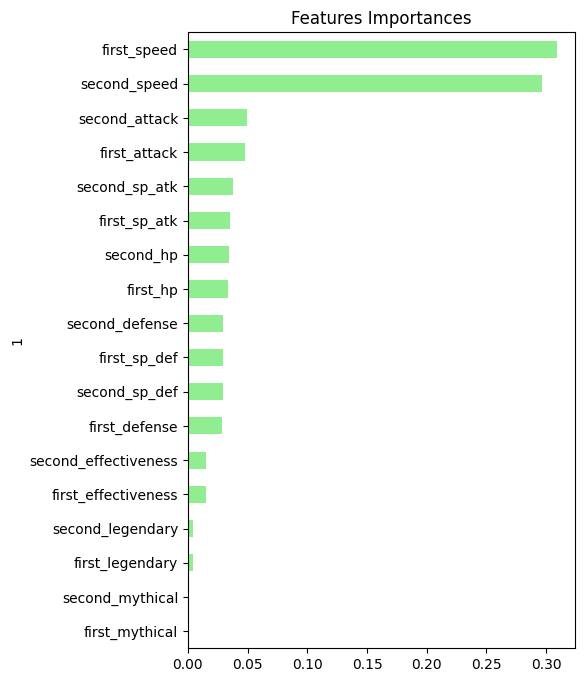

In [6]:
# Create a DataFrame to store feature importances
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# Sort the features by importance and plot them
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False, figsize=(5, 8))

In [7]:
columns = list(df.columns)

# Extract the names of the most important features. Basically excluding the bottom four with very little bearing on the model
sorted_importances = importances_df.index.to_list()[:14]

# Find the columns of the most important features
important_indices = [columns.index(feature) for feature in sorted_importances]

# Create training and testing sets with only the important features
important_train_features = X_train_scaled[:, important_indices]
important_test_features = X_test_scaled[:, important_indices]

In [8]:
# Train the expanded model on only the important features
rf_model.fit(important_train_features, y_train)

# Make predictions on test data
predictions = rf_model.predict(important_test_features)

# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

Accuracy: 0.942432592009447
Precision: 0.9540165165165165
Recall: 0.9373040752351097


In [9]:
# Extract the names of the most important features
sorted_importances2= importances_df.index.to_list()[:9]

# Find the columns of the most important features
important_indices2 = [columns.index(feature) for feature in sorted_importances2]

# Create training and testing sets with only the important features
important_train_features2 = X_train_scaled[:, important_indices2]
important_test_features2 = X_test_scaled[:, important_indices2]

In [10]:
# Train the expanded model on only the important features
rf_model.fit(important_train_features2, y_train)

# Make predictions on test data
predictions2 = rf_model.predict(important_test_features2)

# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions2)}")
print(f"Precision: {precision_score(y_test, predictions2)}")
print(f"Recall: {recall_score(y_test, predictions2)}")

Accuracy: 0.9475496949419405
Precision: 0.961146737080347
Recall: 0.9397012723584731


# Optimizing Hyperparameters

In [11]:
# Look at parameters used by our current forest
from pprint import pprint
rf = RandomForestClassifier(random_state = 78)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}


In [12]:
# Create variables to hold all of the hyperparameter options to test
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1000, 1250, 1500, 1750, 2000]}


In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=78, n_jobs = -1)

# Fit the random search model
rf_random.fit(important_train_features2, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 60, 70, 80, 90, 100,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1000, 1250, 1500, 1750,
                                                         2000]},
                   random_state=78, verbose=2)

In [14]:
# Print the best hyperparameters found with the Randomized Search
rf_random.best_params_

{'n_estimators': 1750,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [15]:
# Use the new model to predict with the test features and find the Accuracy, Precision and Recall

best_random = rf_random.best_estimator_
predictions_rs = best_random.predict(important_test_features2)

print(f"Accuracy: {accuracy_score(y_test, predictions_rs)}")
print(f"Precision: {precision_score(y_test, predictions_rs)}")
print(f"Recall: {recall_score(y_test, predictions_rs)}")


Accuracy: 0.9485337531981893
Precision: 0.9610462928114415
Recall: 0.9417296699243961


In [16]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [55, 60, 65],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 3],
    'n_estimators': [1400, 1500, 1600]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [17]:
# Fit the Grid seach with the training data
grid_search.fit(important_train_features2, y_train)
grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1500}

In [18]:
# Use the new model to predict with the test features and find the Accuracy, Precision and Recall

best_grid = grid_search.best_estimator_
predictions_grid = best_grid.predict(important_test_features2)

print(f"Accuracy: {accuracy_score(y_test, predictions_grid)}")
print(f"Precision: {precision_score(y_test, predictions_grid)}")
print(f"Recall: {recall_score(y_test, predictions_grid)}")

Accuracy: 0.9483369415469396
Precision: 0.9612052730696798
Recall: 0.9411764705882353


## Output the Final Random Forest Model
#### And Create a List of Accuracies to Export

In [19]:
# Dump the final RF model using joblib

final_rf_model = best_grid
joblib.dump(final_rf_model, 'final_rf_model.joblib')

In [20]:
# Create a For Loop to run the model multiple times and make a list of accuracies to compare with the Neural Network
model_accuracies_rf = []

for _ in range(10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    best_grid1 = grid_search.best_estimator_
    train_grid1 = best_grid.fit(X_train_scaled, y_train)
    predictions_grid1 = train_grid1.predict(X_test_scaled)
    model_accuracies_rf.append(accuracy_score(y_test, predictions_grid1))

model_accuracies_rf

[0.9436654366543665,
 0.9432964329643296,
 0.9434194341943419,
 0.943050430504305,
 0.9428044280442804,
 0.9432964329643296,
 0.9428044280442804,
 0.9428044280442804,
 0.9436654366543665,
 0.9428044280442804]

In [21]:
# Export the list of accuracies so the ANOVA analysis can be finished in the Neural Network Model Jupyter Notebook
import pickle

with open('model_accuracies_rf', 'wb') as f:
    pickle.dump(model_accuracies_rf, f)